## 收集

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', 'wb') as f:
    f.write(response.content)

In [4]:
df2 = pd.read_csv('image-predictions', sep = '\t')

从json文件中读取‘转发数’和‘喜欢数’，生成一个新的数据集df3。

In [5]:
import json
data=[]
with open('tweet_json.txt','r') as f:
    for line in f:
        data.append(json.loads(line))
df3 = pd.DataFrame(data, columns=['id', 'retweet_count', 'favorite_count'])
df3.columns = ['tweet_id', 'retweet_count', 'favorite_count']


## 评估

In [6]:
pd.set_option('display.max_colwidth', 200)

In [7]:
df1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mo. No one will push him around in the grocery cart. He's quite pupset about it. 11/10 I volunteer https://t.co/feNwTq12S5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512159186944/photo/1,11,10,Mo,None,None,None,None
2251,667806454573760512,NaN,NaN,2015-11-20 20:47:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Filup. He is overcome with joy after finally meeting his father. 10/10 https://t.co/TBmDJXJB75,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667806454573760512/photo/1,10,10,Filup,None,None,None,None
769,777189768882946048,NaN,NaN,2016-09-17 16:57:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jeffrey. He's being held so he doesn't fly away. 12/10 would set free https://t.co/d3aLyCykn7,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/777189768882946048/photo/1,https://twitter.com/dog_rates/status/777189768882946048/photo/1",12,10,Jeffrey,None,None,None,None
489,813910438903693312,NaN,NaN,2016-12-28 00:52:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chubbs. He dug a hole and now he's stuck in it. Dang h*ckin doggo. 11/10 would assist https://t.co/z1VRj1cYZf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813910438903693312/photo/1,11,10,Chubbs,doggo,None,None,None
2140,670003130994700288,NaN,NaN,2015-11-26 22:16:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Raphael. He is a Baskerville Conquistador. Entertains at all the gatherings. 10/10 simply magnificent https://t.co/3NTykJmtHt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670003130994700288/photo/1,10,10,Raphael,None,None,None,None
1687,681579835668455424,NaN,NaN,2015-12-28 20:57:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Apollo. He thought you weren't coming back so he had a mental breakdown. 8/10 we've all been there https://t.co/ojUBrDCHLT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681579835668455424/photo/1,8,10,Apollo,None,None,None,None
1730,679854723806179328,NaN,NaN,2015-12-24 02:42:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bruce. He's a rare pup. Covered in Frosted Flakes. Nifty gold teeth. Overall good dog. 7/10 would pet firmly https://t.co/RtxxACzZ8A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679854723806179328/photo/1,7,10,Bruce,None,None,None,None
2084,670807719151067136,NaN,NaN,2015-11-29 03:33:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Andy. He can balance on one foot, obliterate u in checkers, &amp; transform into a rug. 11/10 much talents https://t.co/idzH8JH06g",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/670807719151067136/photo/1,https://twitter.com/dog_rates/status/670807719151067136/photo/1,https://twitter.com/dog_rates/status/670807719151067136/photo/1",11,10,Andy,None,None,None,None
1807,676916996760600576,NaN,NaN,2015-12-16 00:0

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
df1.text[df1.rating_denominator != 10]

313                                                                            @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
342                                                                                                                                      @docmisterio account started on 11/15/15
433                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784                                  RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
902                                                                                                Why does th

In [11]:
df1.name.value_counts().head()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Name: name, dtype: int64

In [12]:
#查看tweet_id有无重复
df1['tweet_id'].duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [13]:
df_stage = df1[['doggo','floofer','pupper','puppo']].replace('None', np.nan)

In [14]:
df_stage.count(axis=1).value_counts()

0    1976
1     366
2      14
dtype: int64

In [15]:
df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
75,667405339315146752,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True
488,675517828909424640,https://pbs.twimg.com/media/CV_r3v4VAAALvwg.jpg,1,Scottish_deerhound,0.240591,True,groenendael,0.156916,True,flat-coated_retriever,0.090899,True
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False
380,673295268553605120,https://pbs.twimg.com/media/CVgGc9hWIAIe1bn.jpg,1,golden_retriever,0.889241,True,Labrador_retriever,0.064683,True,Great_Pyrenees,0.012613,True
1602,800018252395122689,https://pbs.twimg.com/ext_tw_video_thumb/800018199223959552/pu/img/3Qp73edtkZO-qWPy.jpg,1,vacuum,0.289485,False,punching_bag,0.243297,False,barbell,0.143630,False
515,676263575653122048,https://pbs.twimg.com/media/CWKSIfUUYAAiOBO.jpg,1,teddy,0.098283,False,toy_poodle,0.098029,True,shopping_basket,0.077852,False
771,689517482558820352,https://pbs.twimg.com/media/CZGofjJW0AINjN9.jpg,1,Pembroke,0.799319,True,Cardigan,0.189537,True,papillon,0.003386,True
121,668204964695683073,https://pbs.twimg.com/media/CUXw3qHWoAAk8HJ.jpg,1,Labrador_retriever,0.655180,True,golden_retriever,0.107884,True,Chesapeake_Bay_retriever,0.065835,True
176,669203728096960512,https://pbs.twimg.com/media/CUl9PGBVEAUV3Wz.jpg,1,pug,0.910452,True,French_bulldog,0.055090,True,Chihuahua,0.014897,True
1009,709225125749587968,https://pbs.twimg.com/media/Cdese-zWEAArIqE.jpg,1,Labrador_retriever,0.271109,True,Pomeranian,0.150487,True,golden_retriever,0.145578,True


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df2.jpg_url.duplicated().sum()

66

In [18]:
df3.sample(10)

,tweet_id,retweet_count,favorite_count
1596,686007916130873345,471,2701
1563,687826841265172480,1280,2979
861,762316489655476224,1288,5336
545,805487436403003392,2916,9734
2185,668967877119254528,25,161
831,768193404517830656,4053,12104
867,761599872357261312,1330,4559
1498,692041934689402880,1420,3704
1910,674330906434379776,83,599
2054,671347597085433856,471,1024


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [20]:
all_columns = pd.Series(list(df1) + list(df2) + list(df3))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

#### 质量 ：
##### df1:  
    1.rating_denominator列的值并非全是10，还有其他值。  
    2.name列有多个名字为‘a’。
    3.狗狗stage的4列doggo\floofer\pupper\puppo，有大量数据缺失，以及存在同时处于2个stage。
    4.转发的tweet即retweeted_status_id有181条，需要删除。
    5.source列的信息冗余，只需要提取'> <'之间的有用信息。  
    6.tweet_id列数据类型是int，应该转化为str。
    7.把rating_numerator、rating_denominator两列数据相除，得到rating列，除去rating列存在的异常值。
  
##### df2:
    8.jpg_url列有66个重复。
    9.df2的tweet_id列int数据应转为str。
    
##### df3:
    10.df3的tweet_id列int数据应转为str。
    
#### 整洁度：
    1.df1狗狗的阶段stage:doggo\floofer\pupper\puppo 4列可以整合成一列。
    2.rating_numerator、rating_denominator 两列数据可以去掉，只需留下rating列即可。
    3.3个数据集有共同的tweet_id,可以合并成一个数据集。
    
    


## 清理

In [21]:
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### 质量:
#### 1.rating_denominator列的值并非全是10，还有其他值。

##### 定义  
重新提取rating_numerator和rating_denominator的数值。

##### 代码

In [22]:
rating = df1_clean.text.str.extract('((?:\d+\.)?\d+)\/([1-9]+[0])', expand = True)
rating.columns = ['rating_numerator', 'rating_denominator']

In [23]:
rating.sample(5)

,rating_numerator,rating_denominator
2168,8,10
1275,13,10
1023,10,10
1965,7,10
1440,12,10


In [24]:
df1_clean['rating_numerator'] = rating['rating_numerator']
df1_clean['rating_denominator'] = rating['rating_denominator']

##### 测试

In [25]:
df1_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2008,672256522047614977,NaN,NaN,2015-12-03 03:30:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Mighty rare dogs here. Long smooth necks. Great knees. Travel in squads. 1 out of every 14 is massive. 8/10 for all https://t.co/PoMKKnKpRd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672256522047614977/photo/1,8,10,None,None,None,None,None
797,773191612633579521,NaN,NaN,2016-09-06 16:10:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Grey. He's the dogtor in charge of your checkpup today. 12/10 I'd never miss an appointment https://t.co/9HEVPJEioD,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/773191612633579521/photo/1,https://twitter.com/dog_rates/status/773191612633579521/photo/1",12,10,Grey,None,None,None,None
388,826598365270007810,NaN,NaN,2017-02-01 01:09:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pawnd... James Pawnd. He's suave af. 13/10 would trust with my life https://t.co/YprN62Z74I,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/826598365270007810/photo/1,https://twitter.com/dog_rates/status/826598365270007810/photo/1,https://twitter.com/dog_rates/status/826598365270007810/photo/1",13,10,Pawnd,None,None,None,None
633,793845145112371200,NaN,NaN,2016-11-02 16:00:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Clark. He was just caught wearing pants. 13/10 game-changing af https://t.co/2Xo19aPrG5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793845145112371200/photo/1,13,10,Clark,None,None,None,None
666,790581949425475584,NaN,NaN,2016-10-24 15:53:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duke. He sneaks into the fridge sometimes. It's his safe place. 11/10 would give little jacket if necessary https://t.co/Fd5WFDTMH4,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/790581949425475584/photo/1,https://twitter.com/dog_rates/status/790581949425475584/photo/1",11,10,Duke,None,None,None,None


In [26]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2353 non-null object
rating_denominator            2353 non-null object
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(1), 

#### 2.name列有多个名字为‘a’。

#### 定义
重新从text中提取宠物的name。

#### 代码

In [27]:
df1_clean['name'] = df1_clean.text.str.extract('(?:This is|Say hello to|Here we have|Here is|named|His name is|Meet)\s([A-Z]\w+)')

In [28]:
df1_clean['name'] = df1_clean['name'].replace('', np.nan)

#### 测试

In [29]:
df1_clean['name'].value_counts()

Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
Sadie          8
Daisy          7
Buddy          7
Bailey         7
Toby           7
Dave           6
Stanley        6
Jack           6
Rusty          6
Leo            6
Jax            6
Bella          6
Scout          6
Oscar          6
Milo           6
Koda           6
Larry          5
Chester        5
Bentley        5
Finn           5
Oakley         5
              ..
Pepe           1
Eleanor        1
Rambo          1
Dunkin         1
Saydee         1
Andy           1
Beemo          1
Dotsy          1
Scruffers      1
Berb           1
Lili           1
Jessifer       1
Brandi         1
Donny          1
Tebow          1
Mauve          1
Chubbs         1
Griswold       1
Pepper         1
Randall        1
Harvey         1
Grizzie        1
Rueben         1
Christoper     1
Guss           1
Glacier        1
Vince          1
Huck          

#### 3.狗狗stage的4列doggo\floofer\pupper\puppo，有大量数据缺失，以及存在同时处于2个stage。

#### 定义

从text中重新提取狗狗的地位分类，形成新的一列df['stage']。

#### 代码

In [30]:
stages = df1_clean.text.str.findall('(doggo|floofer|pupper|puppo)')

In [31]:
stages = stages.apply(lambda x: set(x))

In [32]:
stages = stages.apply(lambda x: ','.join(x))

In [33]:
stages.replace('', np.nan, inplace = True)

In [34]:
stages.value_counts()

pupper          262
doggo            86
puppo            35
doggo,pupper     10
floofer           4
doggo,puppo       2
Name: text, dtype: int64

In [35]:
df1_clean['stage'] = stages

#### 测试

In [36]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2353 non-null object
rating_denominator            2353 non-null object
name                          1530 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
stage                         

#### 4.转发的tweet即retweeted_status_id有181条，需要删除

#### 定义

只留下retweeted_status_id 为空值的行。

#### 代码

In [37]:
df1_clean = df1_clean[df1_clean['retweeted_status_id'].isnull()]

#### 测试

In [38]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2172 non-null object
rating_denominator            2172 non-null object
name                          1418 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
stage                         364 no

#### 5.source列的信息冗余，只需要提取'> <'之间的有用信息。

#### 定义

使用extract()及正则表达式提取关键信息。

#### 代码

In [39]:
df1_clean['source'] = df1_clean.source.str.extract('>(.*)<')

#### 测试

In [40]:
df1_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### 6.tweet_id列数据类型是int，应该转化为str。

In [41]:
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype('str')

#### 7.把rating_numerator、rating_denominator两列数据相除，得到rating列，除去rating列存在的异常值。

#### 定义

添加rating列，其数值为rating_numerator/rating_denominator，查看rating列数值分布情况，去除异常值。

#### 代码

In [42]:
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].astype('float')
df1_clean['rating_denominator'] = df1_clean['rating_denominator'].astype('float')

In [43]:
df1_clean['rating'] = df1_clean['rating_numerator'] / df1_clean['rating_denominator']

In [44]:
df1_clean['rating'].describe()

count    2172.000000
mean        1.219442
std         4.246959
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [45]:
df1_clean['rating'].quantile(0.995)

1.4

In [46]:
df1_clean['rating'].quantile(0.005)

0.2

In [47]:
df1_clean = df1_clean[(df1_clean['rating'] > 0.2) & (df1_clean['rating'] < 1.4)]

#### 测试

In [48]:
df1_clean['rating'].describe()

count    2101.000000
mean        1.063554
std         0.198148
min         0.300000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.350000
Name: rating, dtype: float64

#### 8.jpg_url列有66个重复。

In [49]:
df2_clean.drop_duplicates('jpg_url', 'first', inplace = True)

In [50]:
df2_clean.jpg_url.duplicated().sum()

0

#### 9.df2的tweet_id列int数据应转为str。

In [51]:
df2_clean['tweet_id'] = df2_clean['tweet_id'].astype('str')

#### 10.df3的tweet_id列int数据应转为str。

In [52]:
df3_clean['tweet_id'] = df3_clean['tweet_id'].astype('str')

### 整洁度：
#### 1.狗狗的阶段stage:doggo\floofer\pupper\puppo 4列可以整合成一列。
#### 2.rating_numerator、rating_denominator两列数据可以整合到一列rating，可以删除rating_numerator、rating_denominator列。


#### 定义

1. 因为已经添加了stage列，所以只要删除doggo\floofer\pupper\puppo 4列即可。  
2. 已经添加了rating列，所以删除rating_numerator、rating_denominator两列即可。

#### 代码

In [53]:
df1_clean = df1_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

In [54]:
df1_clean = df1_clean.drop(columns = ['rating_numerator', 'rating_denominator'])

#### 测试

In [55]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2101 non-null object
in_reply_to_status_id         61 non-null float64
in_reply_to_user_id           61 non-null float64
timestamp                     2101 non-null object
source                        2101 non-null object
text                          2101 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2057 non-null object
name                          1396 non-null object
stage                         348 non-null object
rating                        2101 non-null float64
dtypes: float64(5), object(8)
memory usage: 229.8+ KB


#### 3.3个数据集有共同的tweet_id,可以合并成一个数据集。

#### 定义

先合并 df1_celan 与 df2_clean方式是inner，合并后的数据集与df3_clean以left方式合并。

#### 代码 

In [56]:
df_clean = pd.merge(df1_clean, df2_clean, how = 'inner', on = 'tweet_id').merge(df3_clean, how = 'left', on = 'tweet_id')

#### 测试

In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939 entries, 0 to 1938
Data columns (total 26 columns):
tweet_id                      1939 non-null object
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1939 non-null object
source                        1939 non-null object
text                          1939 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1939 non-null object
name                          1354 non-null object
stage                         312 non-null object
rating                        1939 non-null float64
jpg_url                       1939 non-null object
img_num                       1939 non-null int64
p1                            1939 non-null object
p1_conf                       1939 non-null float64
p1_dog                        1939 

In [58]:
#保存合并后的数据集到csv文件
df_clean.to_csv('twitter_archive_master.csv', index = False)

## 观察与分析

In [59]:
df = pd.read_csv('twitter_archive_master.csv')

In [60]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8842,39492
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016


In [61]:
#去掉与观察分析无关的列
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'text', 'expanded_urls', 'jpg_url', 'img_num', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis = 1, inplace = True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939 entries, 0 to 1938
Data columns (total 17 columns):
tweet_id          1939 non-null int64
timestamp         1939 non-null object
source            1939 non-null object
name              1354 non-null object
stage             312 non-null object
rating            1939 non-null float64
p1                1939 non-null object
p1_conf           1939 non-null float64
p1_dog            1939 non-null bool
p2                1939 non-null object
p2_conf           1939 non-null float64
p2_dog            1939 non-null bool
p3                1939 non-null object
p3_conf           1939 non-null float64
p3_dog            1939 non-null bool
retweet_count     1939 non-null int64
favorite_count    1939 non-null int64
dtypes: bool(3), float64(4), int64(3), object(7)
memory usage: 217.8+ KB


In [63]:
df.head()

,tweet_id,timestamp,source,name,stage,rating,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,Phineas,NaN,1.3,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8842,39492
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,Tilly,NaN,1.3,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,Archie,NaN,1.2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,Darla,NaN,1.3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,Franklin,NaN,1.2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016


#### ①retweet_count、favorite_count与评分rating有无相关性？

In [64]:
rate_count = df[['retweet_count', 'favorite_count', 'rating']]

In [65]:
#查看df['rating']的数值中有无异常值
rate_count.describe()

,retweet_count,favorite_count,rating
count,1939.000000,1939.000000,1939.000000
mean,2650.170191,8576.437339,1.056358
std,4562.310504,11992.397393,0.199853
min,15.000000,81.000000,0.300000
25%,614.500000,1927.000000,1.000000
50%,1318.000000,3991.000000,1.100000
75%,3073.500000,10898.000000,1.200000
max,79116.000000,132318.000000,1.350000


In [66]:
rate_count = rate_count[rate_count['rating'].notnull()]

In [67]:
rate_count['rating'].quantile(0.995)

1.3

In [68]:
rate_count['rating'].quantile(0.005)

0.3

In [69]:
rate_count = rate_count[(rate_count['rating'] > 0.2) & (rate_count['rating'] < 1.4)]

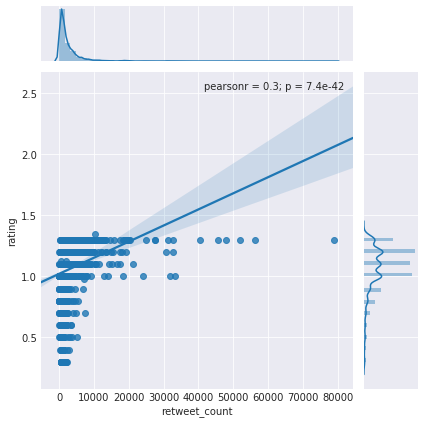

In [70]:
#retweet_count 与 rating 的关系探索
sns.set_style('darkgrid')
sns.jointplot('retweet_count', 'rating', rate_count , kind = 'reg');

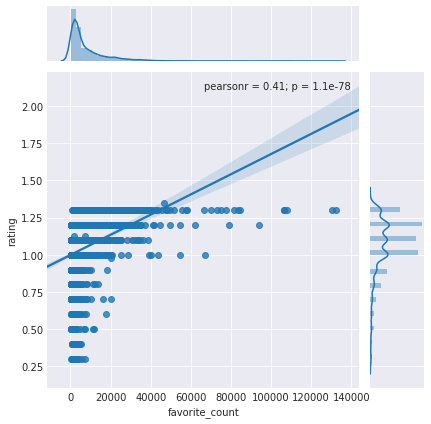

In [71]:
#favorite_count 与 rating 的关系探索
sns.set_style('darkgrid')
sns.jointplot('favorite_count', 'rating', rate_count , kind = 'reg');

从以上两幅图可以看出，retweet_count、favorite_count与评分rating的关系成正相关。说明狗狗的评分对狗狗的喜爱程度（人们的关注度）有影响，亦或是狗狗的喜爱程度（人们的关注度）影响了狗狗的评分。

#### ②不同品种的狗狗的受喜爱程度是怎样的？

In [72]:
dog_predict = df[['p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog']]

In [73]:
dog_breeds = []
for i in dog_predict.index:
    if dog_predict.p1_dog.loc[i] == True:
        dog_breeds.append(dog_predict.p1.loc[i])
    elif dog_predict.p2_dog.loc[i] == True:
        dog_breeds.append(dog_predict.p2.loc[i])
    elif dog_predict.p3_dog.loc[i] == True:
        dog_breeds.append(dog_predict.p3.loc[i])
    else:
        dog_breeds.append(np.nan)   

In [74]:
df['dog_breeds'] = dog_breeds 

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939 entries, 0 to 1938
Data columns (total 18 columns):
tweet_id          1939 non-null int64
timestamp         1939 non-null object
source            1939 non-null object
name              1354 non-null object
stage             312 non-null object
rating            1939 non-null float64
p1                1939 non-null object
p1_conf           1939 non-null float64
p1_dog            1939 non-null bool
p2                1939 non-null object
p2_conf           1939 non-null float64
p2_dog            1939 non-null bool
p3                1939 non-null object
p3_conf           1939 non-null float64
p3_dog            1939 non-null bool
retweet_count     1939 non-null int64
favorite_count    1939 non-null int64
dog_breeds        1657 non-null object
dtypes: bool(3), float64(4), int64(3), object(8)
memory usage: 233.0+ KB


In [76]:
breed_fav = df[['dog_breeds', 'favorite_count']]

In [77]:
breed_fav = breed_fav.dropna()

In [78]:
breed_fav_ct = breed_fav.groupby('dog_breeds')['favorite_count'].mean()

In [79]:
breed_fav_ct = breed_fav_ct.sort_values(ascending = False).head(10)
breed_fav_ct

dog_breeds
Saluki                   23996.250000
Bedlington_terrier       22639.600000
Bouvier_des_Flandres     17961.000000
Afghan_hound             17250.666667
flat-coated_retriever    16731.625000
Irish_water_spaniel      16335.333333
French_bulldog           15396.678571
Leonberg                 14870.000000
English_springer         14114.600000
cocker_spaniel           13798.933333
Name: favorite_count, dtype: float64

In [80]:
breed_fav_ct = breed_fav_ct.reset_index()

In [81]:
breed_fav_ct

,dog_breeds,favorite_count
0,Saluki,23996.250000
1,Bedlington_terrier,22639.600000
2,Bouvier_des_Flandres,17961.000000
3,Afghan_hound,17250.666667
4,flat-coated_retriever,16731.625000
5,Irish_water_spaniel,16335.333333
6,French_bulldog,15396.678571
7,Leonberg,14870.000000
8,English_springer,14114.600000
9,cocker_spaniel,13798.933333


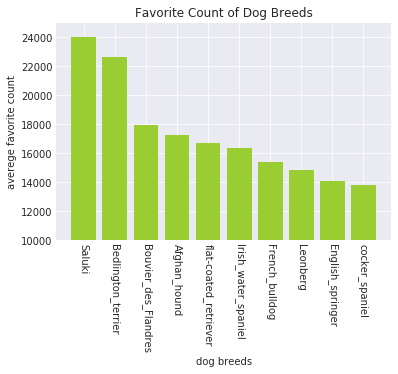

In [82]:
x = breed_fav_ct.dog_breeds
y = breed_fav_ct.favorite_count
plt.bar(range(len(y)), y, tick_label = x, facecolor = 'yellowgreen')
plt.title('Favorite Count of Dog Breeds')
plt.xticks(rotation=270)
plt.ylim(10000, 25000)
plt.xlabel('dog breeds')
plt.ylabel('averege favorite count');

#### 通过将不同品种狗狗获得的平均点赞数，绘制柱状图，得到排名前10的狗狗品种。其中Saluki平均点赞数最高。

#### ③狗狗的什么名字最流行？

In [83]:
names = df.name.dropna()

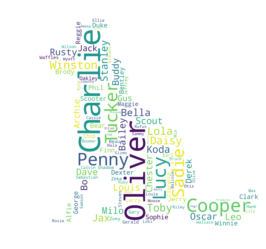

In [84]:
import os
from wordcloud import WordCloud
import PIL.Image as Image
mask_pic = np.array(Image.open(os.path.join('dog.jpg')))
wordcloud = WordCloud(background_color = 'white', max_words = 100, mask = mask_pic).generate(' '.join(names))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()                                                                                                                               

词云中显示 Charlie、Oliver、Coopper、Lucy等字体较大，说明这些名字比较流行，在狗狗中使用较多。